In [90]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from datetime import datetime,date,timedelta
import seaborn as sns
import os, warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [91]:
countryTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')

In [3]:
countryTemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


,Country,Year,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,1838,18.379571,2.756000
1,Afghanistan,1840,13.413455,2.502000
2,Afghanistan,1841,13.997600,2.452100
3,Afghanistan,1842,15.154667,2.381222
4,Afghanistan,1843,13.756250,2.353083


In [15]:
globalTemp = countryTemp.groupby('Year').mean().reset_index(drop=False)
globalTemp.head()

,Year,AverageTemperature,AverageTemperatureUncertainty
0,1743,5.184140,2.183520
1,1744,9.837898,2.136303
2,1745,1.387125,1.960590
3,1750,9.129353,2.103795
4,1751,9.167388,2.053218


In [17]:
globalTemp.tail()

,Year,AverageTemperature,AverageTemperatureUncertainty
262,2009,19.546385,0.348361
263,2010,19.629806,0.345229
264,2011,19.456040,0.362676
265,2012,19.468744,0.460833
266,2013,19.877007,0.554041


In [21]:
globtemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalTemperatures.csv')
globtemp['dt'] = pd.to_datetime(globtemp['dt'])
globtemp['Year'] = globtemp['dt'].apply(lambda x : x.strftime('%Y'))

In [102]:
globTemp = globtemp.groupby('Year').mean().reset_index(drop=False)
globTemp.head()

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1,1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
2,1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
3,1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
4,1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
globTemp = globTemp[['Year']+['LandAverageTemperature']+['LandAverageTemperatureUncertainty']]
globTemp['Upper'] = globTemp['LandAverageTemperature'] + globTemp['LandAverageTemperatureUncertainty']
globTemp['Lower'] = globTemp['LandAverageTemperature'] - globTemp['LandAverageTemperatureUncertainty']
# globTemp['Year'] = globTemp['Year'].apply(lambda x : int(x))
# globTemp = globTemp[globTemp['Year'] >= 1850]
globTemp.head()

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,Upper,Lower
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


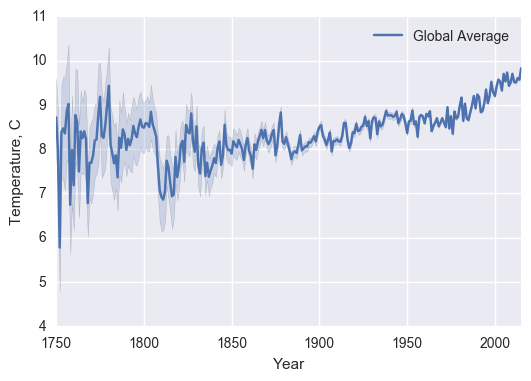

In [104]:
data = [globTemp['LandAverageTemperature'].values,globTemp['Upper'].values,globTemp['Lower'].values]
ax = sns.tsplot(time=globTemp['Year'], value="Temperature, C", 
                condition="Global Average",data=data) 

In [105]:
countryTemp = countryTemp.dropna()
countryTemp['dt'] = pd.to_datetime(countryTemp['dt'])
countryTemp['Year'] = countryTemp['dt'].apply(lambda x : x.strftime('%Y'))
yearTemp = countryTemp.groupby(['Country','Year']).mean().reset_index(drop=False)
yearTemp.head()

,Country,Year,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,1838,18.379571,2.756000
1,Afghanistan,1840,13.413455,2.502000
2,Afghanistan,1841,13.997600,2.452100
3,Afghanistan,1842,15.154667,2.381222
4,Afghanistan,1843,13.756250,2.353083


In [107]:
canadaTemp = yearTemp[yearTemp['Country'] == 'Canada']
canadaTemp['Upper'] = canadaTemp['AverageTemperature'] + canadaTemp['AverageTemperatureUncertainty']
canadaTemp['Lower'] = canadaTemp['AverageTemperature'] - canadaTemp['AverageTemperatureUncertainty']
canadaTemp['Uncertainty'] = canadaTemp['AverageTemperatureUncertainty']/canadaTemp['AverageTemperature']
canadaTemp.head()

,Country,Year,AverageTemperature,AverageTemperatureUncertainty,Upper,Lower,Uncertainty
7306,Canada,1768,-7.886750,3.669250,-4.217500,-11.556000,-0.465242
7307,Canada,1769,-3.427875,3.505500,0.077625,-6.933375,-1.022645
7308,Canada,1774,-13.089333,3.670000,-9.419333,-16.759333,-0.280381
7309,Canada,1775,-4.210833,3.049583,-1.161250,-7.260417,-0.724223
7310,Canada,1776,-5.411750,3.272667,-2.139083,-8.684417,-0.604734


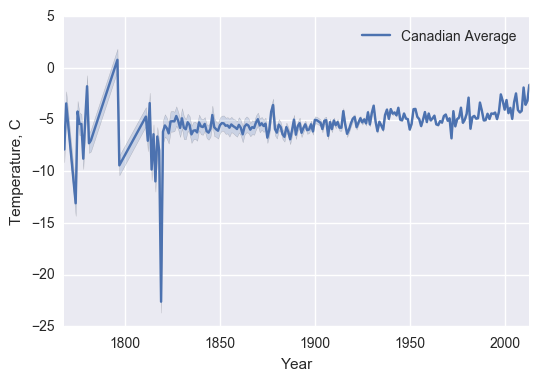

In [109]:
canadaData = [canadaTemp['AverageTemperature'],canadaTemp['Upper'],canadaTemp['Lower']]
ax = sns.tsplot(time=canadaTemp['Year'], value="Temperature, C", 
                condition="Canadian Average",data=canadaData) 

In [108]:
russiaTemp = yearTemp[yearTemp['Country'] == 'Russia']
russiaTemp['Upper'] = russiaTemp['AverageTemperature'] + russiaTemp['AverageTemperatureUncertainty']
russiaTemp['Lower'] = russiaTemp['AverageTemperature'] - russiaTemp['AverageTemperatureUncertainty']
russiaTemp['Uncertainty'] = russiaTemp['AverageTemperatureUncertainty']/russiaTemp['AverageTemperature']
russiaTemp.head()

,Country,Year,AverageTemperature,AverageTemperatureUncertainty,Upper,Lower,Uncertainty
33964,Russia,1812,-7.046833,3.945333,-3.101500,-10.992167,-0.559873
33965,Russia,1813,-7.084818,3.975364,-3.109455,-11.060182,-0.561110
33966,Russia,1814,-6.435909,4.063545,-2.372364,-10.499455,-0.631386
33967,Russia,1815,-21.342000,4.345500,-16.996500,-25.687500,-0.203613
33968,Russia,1816,-1.628333,4.036889,2.408556,-5.665222,-2.479154


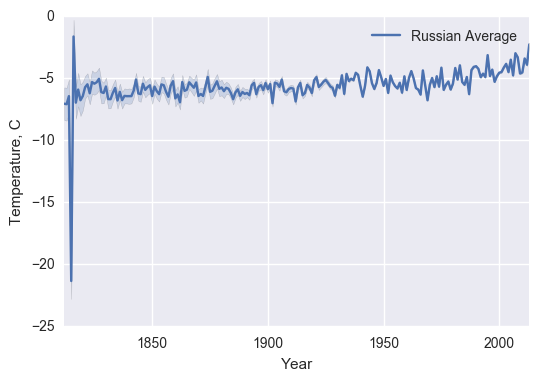

In [93]:
russiaData = [russiaTemp['AverageTemperature'],russiaTemp['Upper'],russiaTemp['Lower']]
ax = sns.tsplot(time=russiaTemp['Year'], value="Temperature, C", 
                condition="Russian Average",data=russiaData) 

In [173]:
gammas = sns.load_dataset("gammas")
gammas.head(100)
# ax = sns.tsplot(time="timepoint", value="BOLD signal",unit="subject", condition="ROI",data=gammas)

,timepoint,ROI,subject,BOLD signal
0,0.00000,IPS,0,0.513433
1,0.00000,IPS,1,-0.414368
2,0.00000,IPS,2,0.214695
3,0.00000,IPS,3,0.814809
4,0.00000,IPS,4,-0.894992
5,0.00000,IPS,5,-0.073709
6,0.00000,IPS,6,3.542734
7,0.00000,IPS,7,0.080169
8,0.00000,IPS,8,1.547083
9,0.00000,IPS,9,2.827153


In [189]:
canadaT = canadaTemp[['Country']+['Year']+['AverageTemperature']]
canadaT.columns = ['Country','Year','AvgTemp']
canadaT['Count'] = 0
canadaU = canadaTemp[['Country']+['Year']+['Upper']]
canadaU.columns = ['Country','Year','AvgTemp']
canadaU['Count'] = 1
canadaL = canadaTemp[['Country']+['Year']+['Lower']]
canadaL.columns = ['Country','Year','AvgTemp']
canadaL['Count'] = 2
allCanada = canadaT.append(canadaU)
allCanada = allCanada.append(canadaL).sort_values('Year').reset_index(drop=True)

In [190]:
globTemp['Country'] = 'Global'
globT = globTemp[['Country']+['Year']+['LandAverageTemperature']]
globT.columns = ['Country','Year','AvgTemp']
globT['Count'] = 0
globU = globTemp[['Country']+['Year']+['Upper']]
globU.columns = ['Country','Year','AvgTemp']
globU['Count'] = 1
globL = globTemp[['Country']+['Year']+['Lower']]
globL.columns = ['Country','Year','AvgTemp']
globL['Count'] = 2
allGlob = globT.append(globU)
allGlob = allGlob.append(globL).sort_values('Year').reset_index(drop=True)
# allGlob.head()

In [193]:
data = allCanada.append(allGlob).sort_values('Year')
data.head()

,Country,Year,AvgTemp,Count
0,Global,1750,8.719364,0
1,Global,1750,11.357182,1
2,Global,1750,6.081545,2
3,Global,1751,7.976143,0
4,Global,1751,10.757286,1


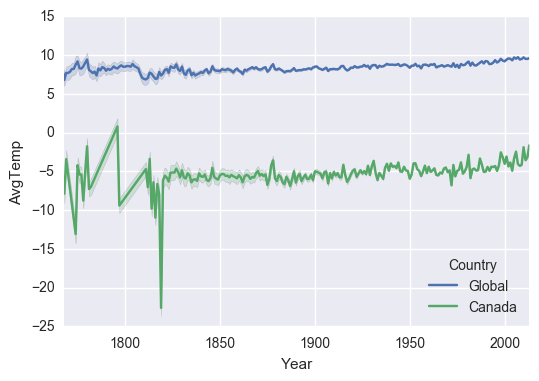

In [192]:
ax = sns.tsplot(time='Year', 
                value='AvgTemp', 
                unit='Count',
                condition='Country',
                data=data)